<h3 style='color:tomato'>Titanic Data Analysis Project</h3>

<h5>This project aims to explore and analyse the titanic  dataset to understand survival patterns</h5>

<h4 style='color:tomato'>Import Libraries</h4>

<h5>We will use Numpy, Pandas and Matplotlib for this analysis</h5>

In [3]:
import numpy as np

import pandas as pd

<h4 style='color:tomato'>Loading the dataset</h4>

<h5>We load the Titanic dataset into a Pandas DataFrame and begin the exploration</h5>

In [6]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h4 style='color:tomato'>Exploring the dataset</h4>

<h5>We will begin by exploring the structure and contents of the dataset.</h5>
<h5>Goal here is to understand types of data we are working with, identify missing values and get high level overview of the dataset</h5>

In [11]:
# to get the total number of rows and columns in the dataset

titanic.shape

(891, 12)

In [13]:
# to get the names of all columns in the dataset

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# to find the data types of all the columns

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
# to find the structure of the dataset, no: of rows & columns, names of columns and count of non-null values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic.describe()

# this will give the statistical summary for all the numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# to count the number of missing values in each column

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observation:**  
We see that the `Age`, `Cabin`, and `Embarked` columns contain missing values. We'll handle them in the Data Cleaning section.


<h4 style='color:tomato'>Data Cleaning</h4>

<h5>Before dive deeper into visualizations and insights, we need to clean our dataset</h5>
<h5>This involves handling missing values, correcting data types if needed and ensuring our data is ready for analysis</h5>

**Missing Value Percentage Analysis**

Instead of just counting the number of missing values, we will calculate the percentage of missing values in each column.
This will help us decide whether to drop the column or handle it using imputation 

In [26]:
# to find the percentage of missing values in each column :

missing_percentage = (titanic.isnull().sum()) / (len(titanic)) * 100

missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [28]:
missing_df = pd.DataFrame({ 'column': titanic.columns, 'MissingPercentage':missing_percentage })

missing_df = missing_df[missing_df['MissingPercentage'] > 0].sort_values(by='MissingPercentage', ascending=False)

missing_df

# a dataframe is created in which, only the columns that actutally has missing values is kept and is sorted such that the columns with the-
# highest missing percentage appears first

,column,MissingPercentage
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467


**Observation:**

- The `Cabin` column has more than 75% missing values. We'll drop this column.

- The `Age` column has about ~20% missing, so we'll fill it using the median.

- The `Embarked` column has very few missing entries, so we'll fill it using the mode.

In [31]:
# dropping the cabin column

titanic.drop(columns=['Cabin'], inplace=True)

In [33]:
# filling Age with median

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [35]:
# filling Embarked with mode

titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

**Capitalizing 'SEX' column**

To ensure consistency in text values, we capitalized first letter in the 'SEX' column.

In [38]:
titanic['Sex'] = titanic['Sex'].str.capitalize()

**Renaming Columns for clarity**

Renaming `SibSp` to `Siblings_Spouses_Aboard` and `Parch` to `Parents_Children_Aboard` for better readability and understanding.

In [41]:
titanic.rename(columns={
    'SibSp': 'Siblings_Spouses_Aboard',
    'Parch': 'Parents_Children_Aboard'
}, inplace=True)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C


In [43]:
titanic['Age'].dtype

dtype('float64')

<h4 style='color:tomato'>Feature Engineering</h4>

<h5>In this section, we'll extract new features from the existing data to gain more insights and improve the quality of analysis.</h5>

**Extracting Title from Name**

We'll extract titles such as Mr, Mrs, Miss, etc., from the `Name` column. These titles can give us insights about passenger age groups, gender, and social status.

In [47]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,28.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C,Mr


**Encoding the 'SEX' column**

We will convert the categorical `Sex` column into numerical values:
- 0 for male
- 1 for female

This step is part of feature engineering and helps in numerical computations, such as correlation analysis and machine learning models.

In [50]:
# Keep original column, add a new one for encoded values

titanic['Sex_encoded'] = titanic['Sex'].map({'Male': 0, 'Female': 1})

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Ticket,Fare,Embarked,Title,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,S,Rev,0
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,28.0,1,2,W./C. 6607,23.4500,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C,Mr,0


<h4 style='color:tomato'>Exploratory Data Analysis</h4>

<h5>Now that the dataset is cleaned and preprocessed, we'll explore it through visualizations to understand patterns and relationships between features like survival, age, gender, and class.</h5>

In [53]:
import matplotlib.pyplot as plt

1. **Overall Survival Count**

Let's start by looking at how many passengers survived and how many did not.

In [55]:
survival_counts = titanic['Survived'].value_counts()

# This counts how many people survived (1) and how many people did not (0).

# value_counts returns the counts of each value in the Survived column 

# It saves the result into a variable called survival_counts

survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

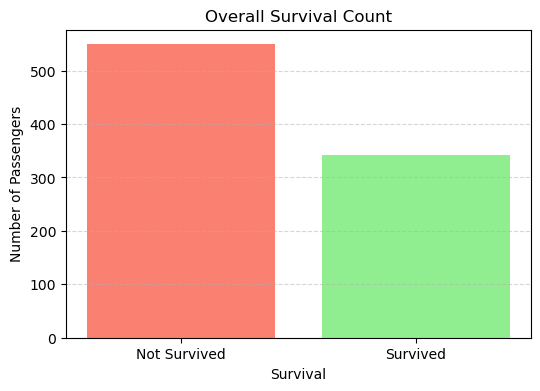

In [56]:
plt.figure(figsize=(6, 4))

plt.bar(['Not Survived', 'Survived'], survival_counts, color=['salmon', 'lightgreen'])

plt.title('Overall Survival Count')

plt.xlabel('Survival')

plt.ylabel('Number of Passengers')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Observation:**

From the chart above, we can see that a significantly higher number of passengers did not survive the Titanic disaster. Out of all passengers, 549 died while only 342 survived. This gives us an initial sense of how imbalanced the survival distribution is.


2. **Survival Count by Gender**

We will now visualize how survival is varied between male and female passengers.

In [59]:
gender_survival = titanic.groupby(['Sex', 'Survived']).size().unstack()

# this will group the data based on both Sex and Survived 

# count the number of rows in each group 

# convert the inner Survived values (0 and 1) into seperate columns, so the data becomes easier to plot.

gender_survival

Survived,0,1
Sex,,
Female,81,233
Male,468,109


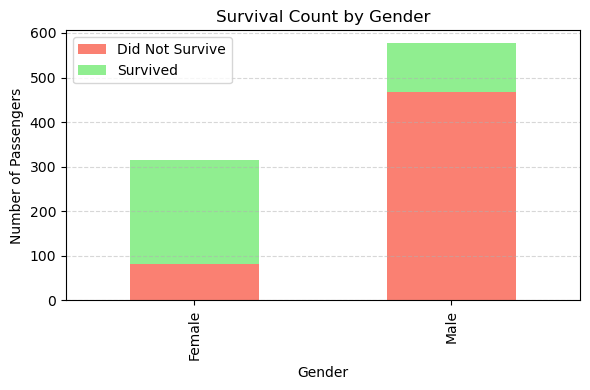

In [60]:
gender_survival.plot(kind='bar', 
                     stacked=True, 
                     color=['salmon', 'lightgreen'], 
                     figsize=(6, 4))

plt.title('Survival Count by Gender')

plt.xlabel('Gender')

plt.ylabel('Number of Passengers')

plt.legend(['Did Not Survive', 'Survived'])

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Observation**

From the chart above, we can observe that out of 314 female passengers, 233 passengers survived and the rest did not. In the case of male passengers, out of the total 577, 468 of them did not survive.

This suggests that gender had a strong impact on survival chances, possibly due to the "women and children first" evacuation policy followed during the disaster.

3. **Survival Count by Passenger Class (Pclass)**

Let’s visualize how survival rates varied across different passenger classes.

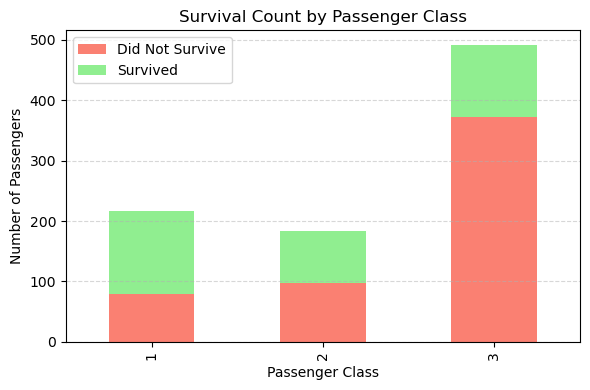

In [67]:
# Group by class and survival status
class_survival = titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Plot
class_survival.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], figsize=(6, 4))

plt.title('Survival Count by Passenger Class')

plt.xlabel('Passenger Class')

plt.ylabel('Number of Passengers')

plt.legend(['Did Not Survive', 'Survived'])

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Observation:**

Passengers in 1st class had a much higher survival rate compared to those in 2nd and 3rd class.  
The majority of 3rd class passengers did not survive, showing that class played a major role in survival chances.

4. **Survival Count by Embarked Port**

We will examine if the place passengers boarded from had any impact on their survival. 

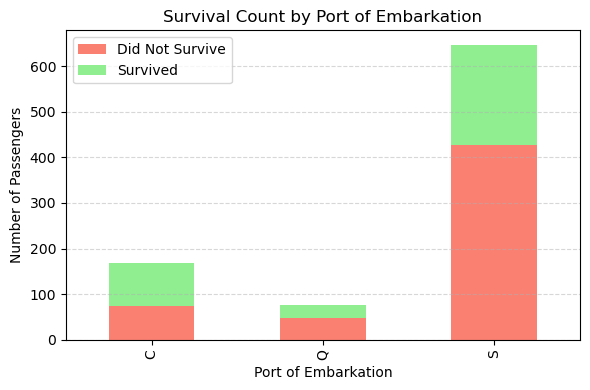

In [71]:
# Group by Embarked and Survived
embarked_survival = titanic.groupby(['Embarked', 'Survived']).size().unstack()

# Plot
embarked_survival.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], figsize=(6, 4))

plt.title('Survival Count by Port of Embarkation')

plt.xlabel('Port of Embarkation')

plt.ylabel('Number of Passengers')

plt.legend(['Did Not Survive', 'Survived'])

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Observation:**

Most passengers boarded from Southampton, and among them, more people died than survived.  
In contrast, passengers from Cherbourg had a higher survival rate, suggesting class or demographic differences by port.

5. **Age Distribution of Passengers**

Here, we will explore the overall age distribution passengers on board using a histogram

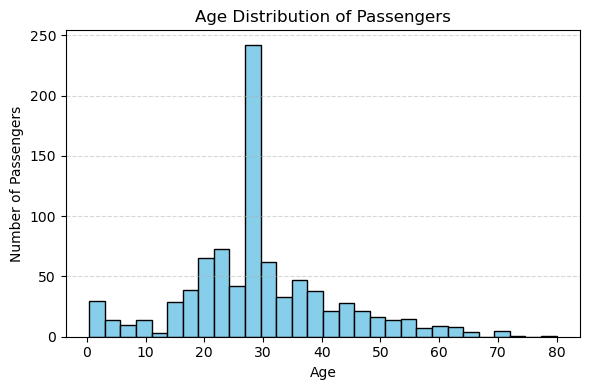

In [75]:
plt.figure(figsize=(6, 4))

plt.hist(titanic['Age'], bins=30, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Passengers')

plt.xlabel('Age')

plt.ylabel('Number of Passengers')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Observation:**

Most passengers were between 20 to 40 years old, and very few were older than 60.  
There were also many children on board.

6. **Fare distribution of Passengers**

Here, we will analyse how fares are distributed among passengers using a histogram.

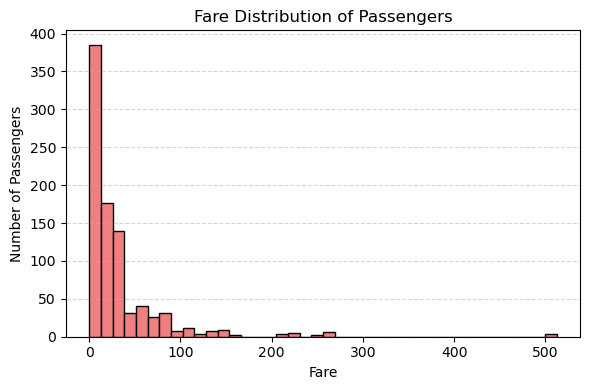

In [79]:
plt.figure(figsize=(6, 4))

plt.hist(titanic['Fare'], bins=40, color='lightcoral', edgecolor='black')

plt.title('Fare Distribution of Passengers')

plt.xlabel('Fare')

plt.ylabel('Number of Passengers')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Observation:**

Most passengers paid a fare below 50 units.  
There are a few passengers who paid very high fares, indicating outliers, likely 1st class VIPs.

7. **Survival Count by Age**

This bar plot compares survival counts for each individual age.

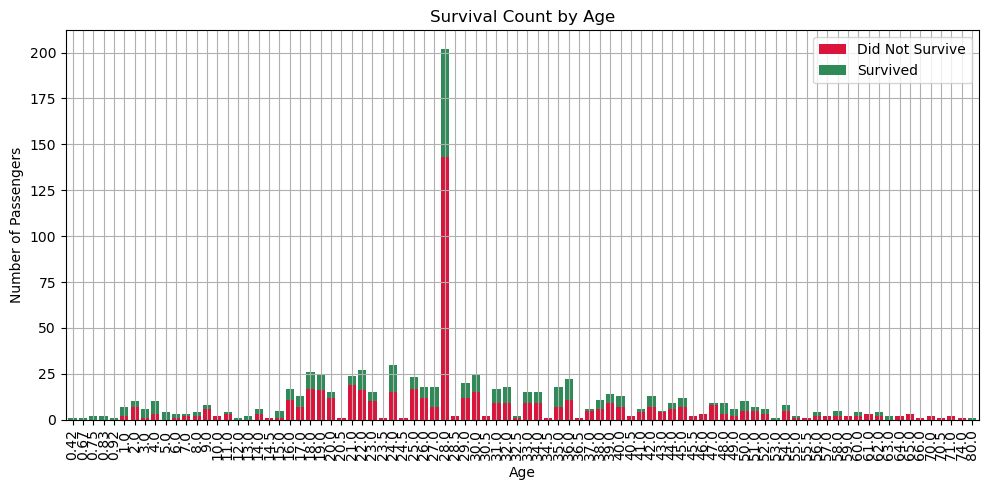

In [82]:
# Group by Age and Survival, count
age_survival = titanic.groupby(['Age', 'Survived']).size().unstack()

# Plot
age_survival.plot(kind='bar', stacked=True, figsize=(10, 5), width=0.8, color=['crimson', 'seagreen'])

plt.title('Survival Count by Age')

plt.xlabel('Age')

plt.ylabel('Number of Passengers')

plt.legend(['Did Not Survive', 'Survived'])

plt.grid(True)

plt.tight_layout()

plt.show()

**Observation:**

- Survival among very young passengers (babies and children) appears relatively better.
- Adults of ages between 20 and 40 dominate the passenger count.
- Elderly passengers were fewer and had slightly lower survival rates.